## Contract analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
contracts = pd.read_csv("master_contract.csv")

contracts.head()

contracts.columns

contracts.info()

contracts.describe()

contracts.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   token_address                           2123 non-null   object
 1   chain                                   2123 non-null   object
 2   token_name                              2123 non-null   object
 3   contract_name                           1378 non-null   object
 4   verified                                2123 non-null   bool  
 5   owner                                   1782 non-null   object
 6   creator                                 2123 non-null   object
 7   is_hidden_owner                         2123 non-null   bool  
 8   is_proxy                                1378 non-null   object
 9   is_sellable                             2123 non-null   bool  
 10  is_hardcoded_owner                      1378 non-null   object
 11  has_

token_address                               0
chain                                       0
token_name                                  0
contract_name                             745
verified                                    0
owner                                     341
creator                                     0
is_hidden_owner                             0
is_proxy                                  745
is_sellable                                 0
is_hardcoded_owner                        745
has_source_code                             0
has_abi                                     0
total_snippets                              0
mint_function_detected_number               0
ownership_renounced_number                  0
is_honeypot_suspected_number                0
delayed_trading_detected_number             0
transfer_cooldown_detected_number           0
high_tax_detected_number                    0
blacklist_or_whitelist_detected_number      0
trading_disabled_possible_number  

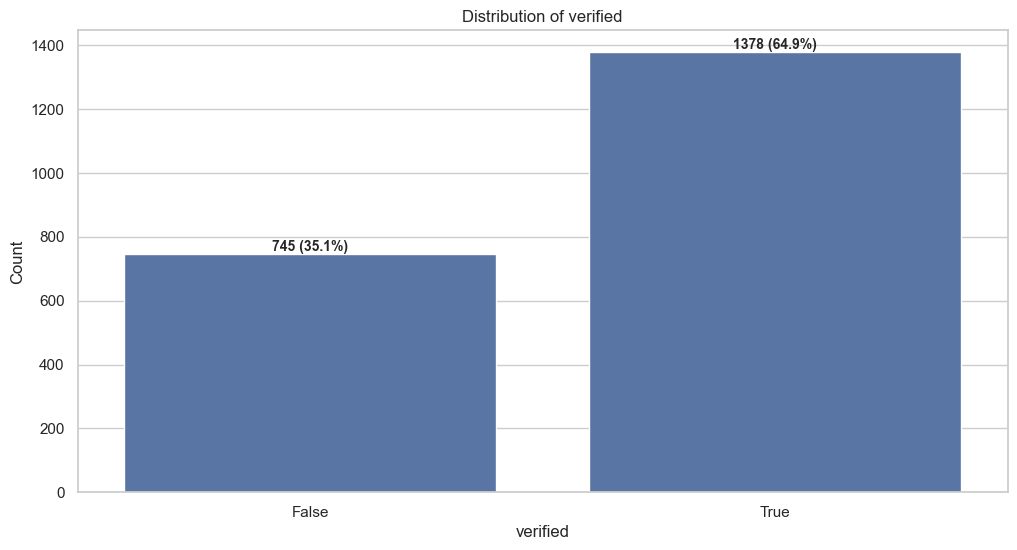

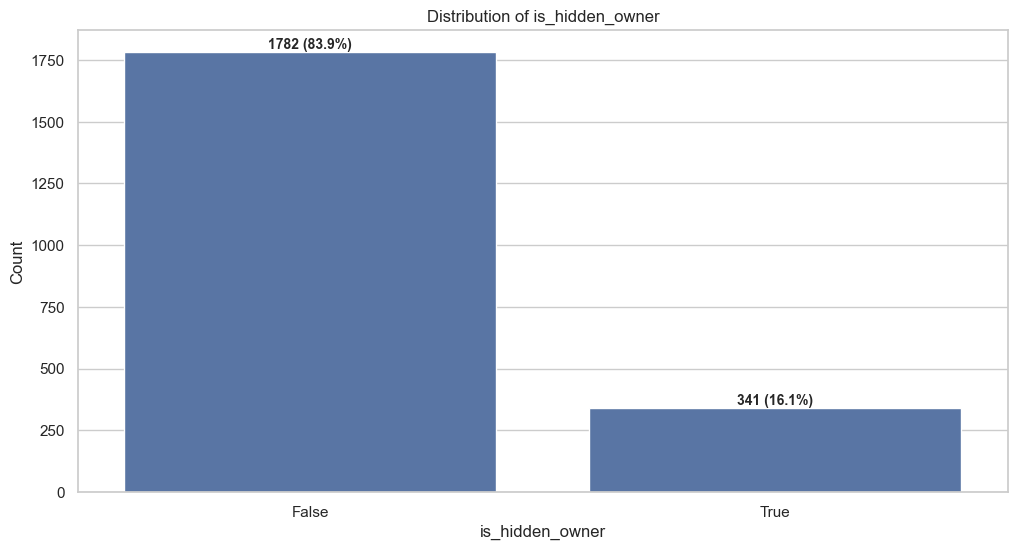

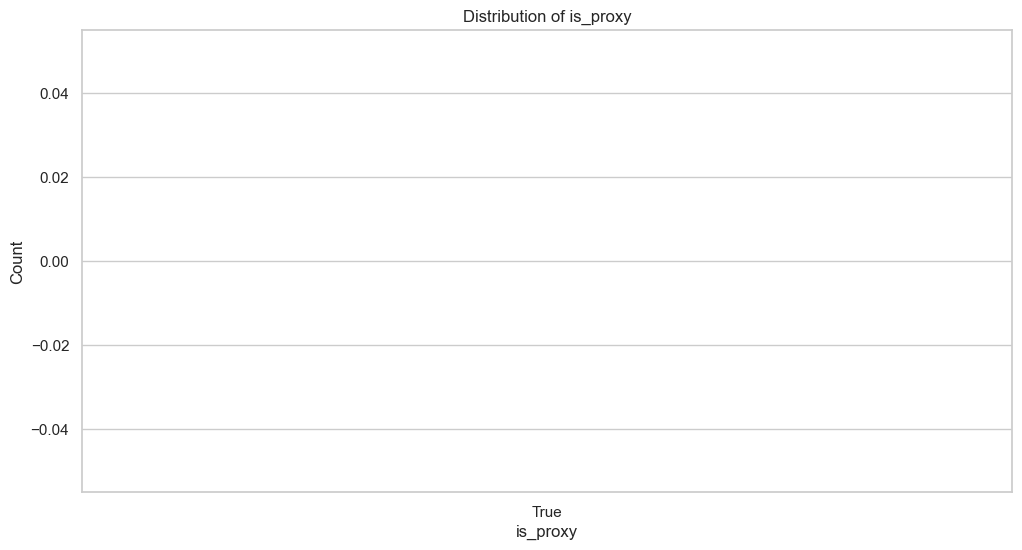

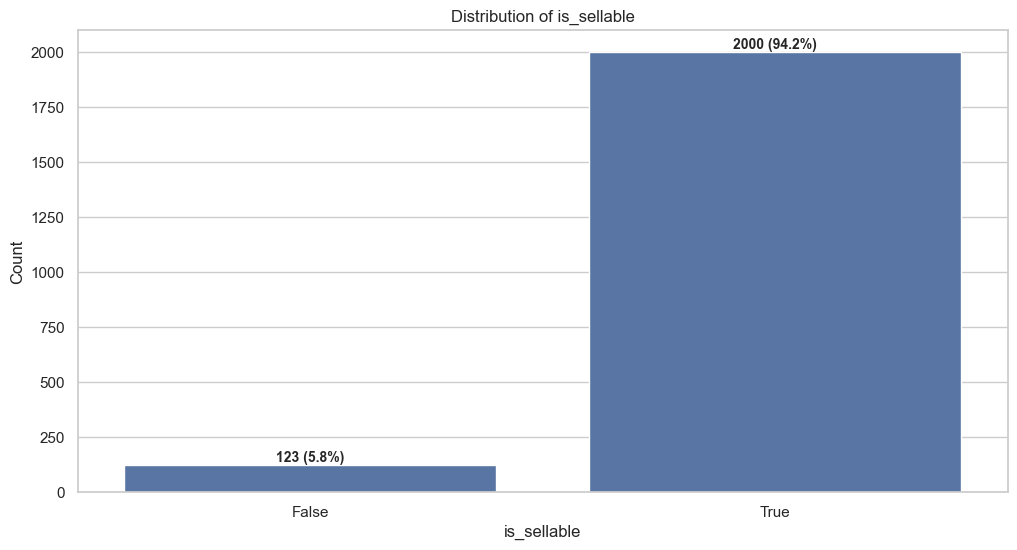

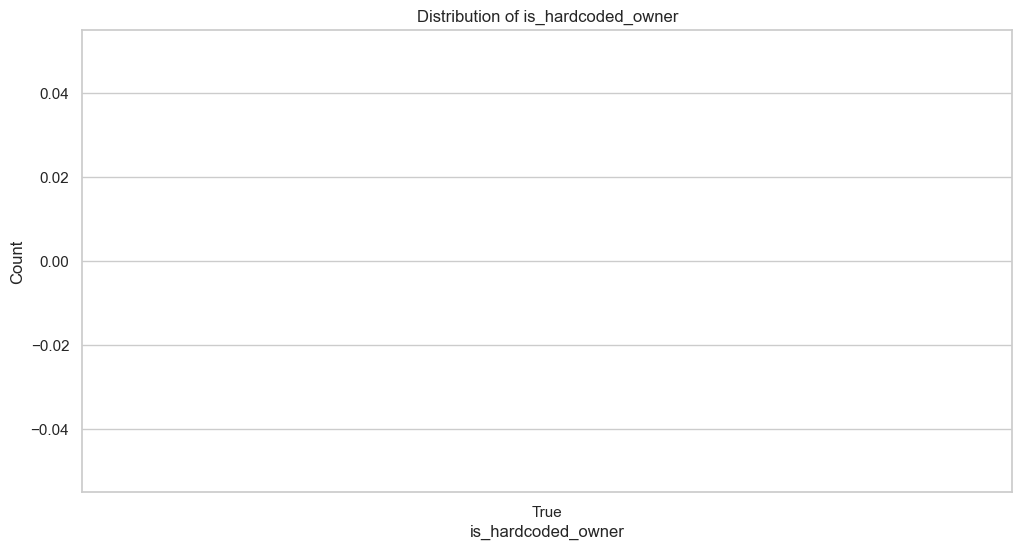

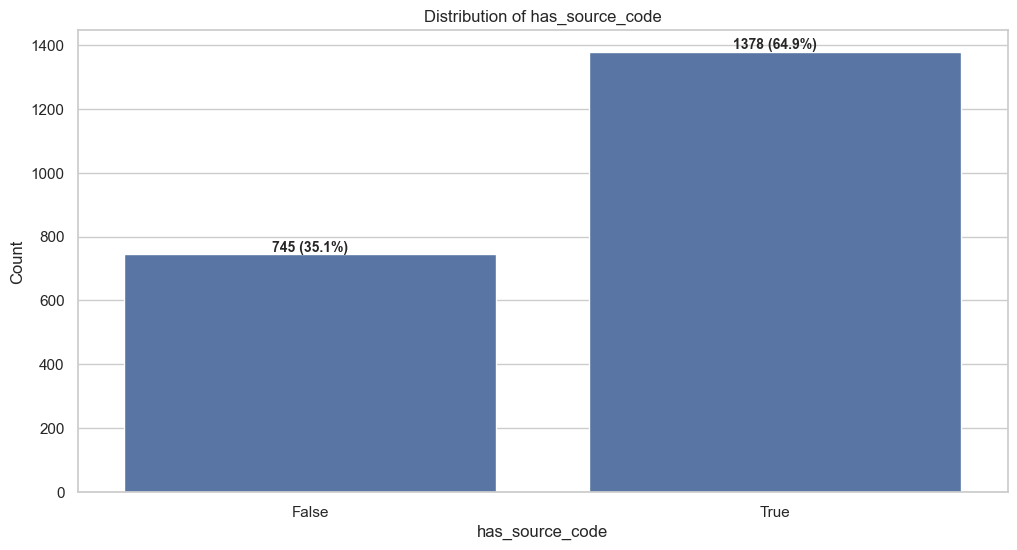

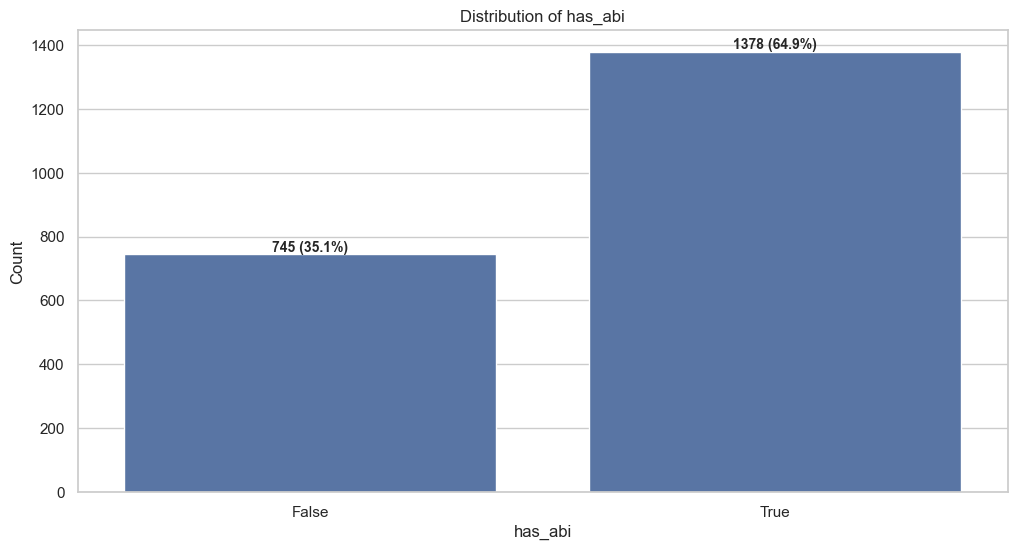

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv('master_contract.csv')
#df.head()

#df.info()


# Convert boolean-like columns (if they're strings like 'True'/'False') to actual bools
bool_cols = ['verified', 'is_hidden_owner', 'is_proxy', 'is_sellable',
             'is_hardcoded_owner', 'has_source_code', 'has_abi']

for col in bool_cols:
    if df[col].dtype == object:
        df[col] = df[col].map({'True': True, 'False': False})

# Plot boolean column distributions
for col in bool_cols:
    # Count values
    counts = df[col].value_counts().sort_index()
    total = counts.sum()
    percentages = counts / total * 100

    # Plot
    ax = sns.countplot(data=df, x=col, order=[False, True] if False in counts.index else [True])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add annotations for count and percentage
    for i, p in enumerate(ax.patches):
        count = counts.iloc[i]
        percent = percentages.iloc[i]
        ax.annotate(f'{count} ({percent:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold')

    plt.show()

C:\Users\Famiglia\AppData\Local\Temp\ipykernel_1356\695871407.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = f"{height:.2f} ({percentages[i]:.1f}%)"


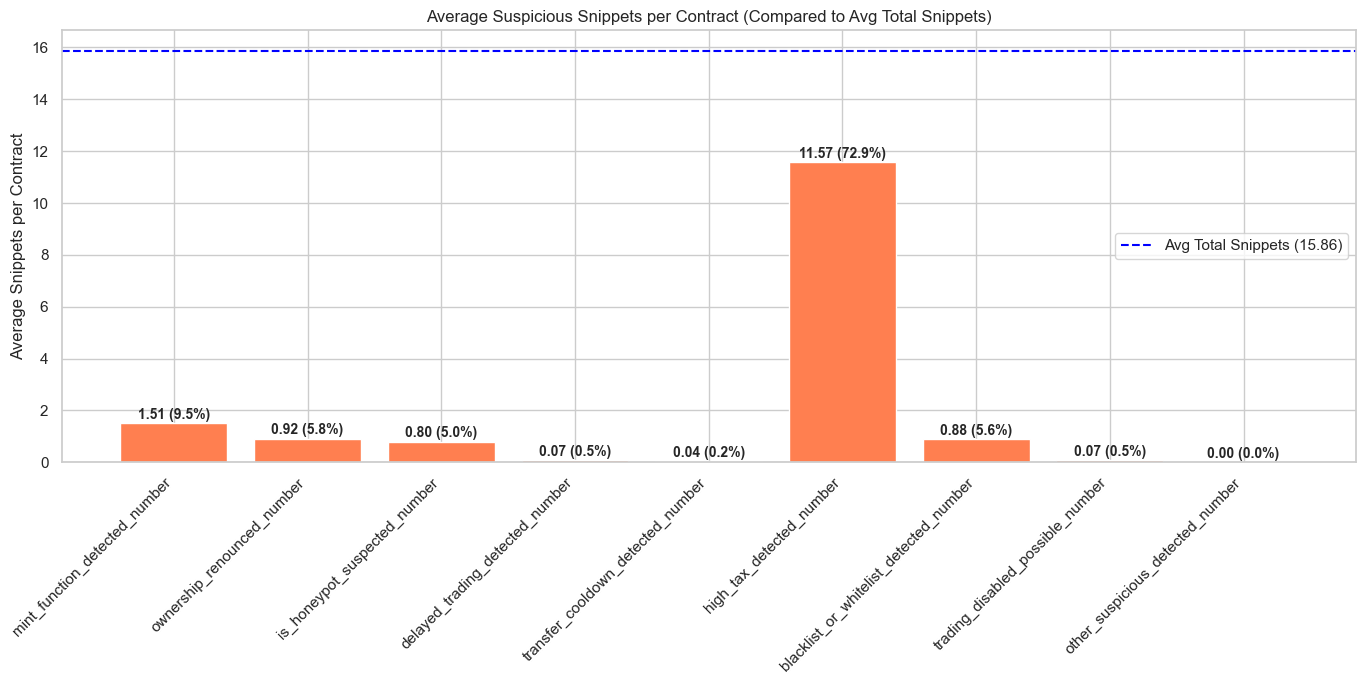

In [4]:
suspicious_cols = [
    'mint_function_detected_number',
    'ownership_renounced_number',
    'is_honeypot_suspected_number',
    'delayed_trading_detected_number',
    'transfer_cooldown_detected_number',
    'high_tax_detected_number',
    'blacklist_or_whitelist_detected_number',
    'trading_disabled_possible_number',
    'other_suspicious_detected_number'
]

# Get the average per contract
avg_total_snippets = df['total_snippets'].mean()
avg_suspicious = df[suspicious_cols].mean()

# Calculate percentages relative to average total_snippets
percentages = (avg_suspicious / avg_total_snippets) * 100

# Plot
plt.figure(figsize=(14, 7))
bars = plt.bar(avg_suspicious.index, avg_suspicious.values, color='coral')

# Add labels with average count and percentage
for i, bar in enumerate(bars):
    height = bar.get_height()
    label = f"{height:.2f} ({percentages[i]:.1f}%)"
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05,
             label, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Draw a horizontal line for average total snippets
plt.axhline(avg_total_snippets, color='blue', linestyle='--', label=f'Avg Total Snippets ({avg_total_snippets:.2f})')

plt.title('Average Suspicious Snippets per Contract (Compared to Avg Total Snippets)')
plt.ylabel('Average Snippets per Contract')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()